In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-position/upper.csv


In [2]:
df = pd.read_csv("../input/product-position/upper.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
0,0,-0.214777,-0.074414,0.079668,-0.041953,-0.715294,0.043155,0.754480,0.628223,-0.074455,...,0.088765,0.285463,-0.060605,-0.542769,-0.006594,0.665262,-0.015711,-0.667007,-0.013797,0.368727
1,0,-0.253997,0.000337,0.060563,-0.101104,-0.701834,0.070198,0.748214,0.656058,0.016878,...,0.182359,-0.046342,-0.233167,-0.234710,0.183400,0.591095,-0.059619,-0.819383,-0.283455,0.414261
2,0,-0.212620,-0.136841,0.113312,0.014819,-0.714882,-0.012742,0.720049,0.666651,-0.012994,...,0.020312,0.042942,-0.171825,-0.373853,-0.104966,0.448661,0.347881,-0.296482,-0.369788,-0.097517
3,0,-0.156624,-0.255746,0.086175,0.086967,-0.657194,0.011942,0.792931,0.718432,-0.084970,...,-0.142067,0.143729,-0.000996,-0.482060,-0.256660,0.559800,0.520810,-0.381071,-0.506321,-0.038203
4,0,-0.212018,0.003571,-0.026051,-0.032036,-0.683312,-0.024696,0.778626,0.821851,0.083669,...,-0.057536,0.141625,-0.370610,-0.451844,0.315462,0.651035,-0.119629,-0.642190,-0.087899,0.252129


In [3]:
df.shape

(2136, 1175)

In [4]:
df.groupby(0)[0].count()

0
0     343
1      87
2      29
3      13
4      52
5     105
6       2
7       2
8     741
9     433
10     91
11     62
12    163
13      4
14      9
Name: 0, dtype: int64

In [5]:
df_sel = df[(df[0]==0) | (df[0]==8) | (df[0]==9)]
df_sel.shape

(1517, 1175)

In [6]:
Xo = df_sel.drop([0],axis=1).values
yo = df_sel[0].values

In [7]:
Xo.shape

(1517, 1174)

In [8]:
yo.shape

(1517,)

In [9]:
np.unique(yo)

array([0, 8, 9])

In [10]:
yo[yo==8] = 1
yo[yo==9] = 2
np.unique(yo)

array([0, 1, 2])

In [11]:
[sum(yo == item) for item in np.unique(yo)]

[343, 741, 433]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [14]:
X_train.shape

(970, 1174)

In [15]:
X_val.shape

(243, 1174)

In [16]:
X_test.shape

(304, 1174)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)
y = y_res

In [18]:
y

array([1, 0, 1, ..., 2, 2, 2])

In [19]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [20]:
yv_multi

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1

In [21]:
sample_size, input_size = X_train_norm.shape

In [22]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(input_size,)),
      #tf.keras.layers.Dense(2, activation='relu'),
      #tf.keras.layers.Dense(3, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

2021-10-05 07:43:38.929501: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 07:43:38.929673: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,100):
  history = model.fit(X_train_norm, y_multi, epochs= 2, batch_size = int(sample_size/5), validation_data= (X_val_norm, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

2021-10-05 07:43:43.838417: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-05 07:43:43.841274: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 07:43:43.841318: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-05 07:43:43.841351: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (37ac24e685dc): /proc/driver/nvidia/version does not exist
2021-10-05 07:43:43.842431: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Epoch 1/2
5/5 [==============================] - 1s 165ms/step - loss: 1.0318 - accuracy: 0.4895 - val_loss: 0.8370 - val_accuracy: 0.8272
Epoch 2/2
5/5 [==============================] - 0s 18ms/step - loss: 0.7929 - accuracy: 0.7409 - val_loss: 0.7483 - val_accuracy: 0.6996
Epoch 1/2
5/5 [==============================] - 0s 33ms/step - loss: 0.6258 - accuracy: 0.8132 - val_loss: 0.5546 - val_accuracy: 0.8724
Epoch 2/2
5/5 [==============================] - 0s 17ms/step - loss: 0.5058 - accuracy: 0.8785 - val_loss: 0.5222 - val_accuracy: 0.8436
Epoch 1/2
5/5 [==============================] - 0s 35ms/step - loss: 0.4333 - accuracy: 0.8861 - val_loss: 0.3939 - val_accuracy: 0.9095
Epoch 2/2
5/5 [==============================] - 0s 18ms/step - loss: 0.3800 - accuracy: 0.9021 - val_loss: 0.4002 - val_accuracy: 0.8971
Epoch 1/2
5/5 [==============================] - 0s 38ms/step - loss: 0.3367 - accuracy: 0.9097 - val_loss: 0.3143 - val_accuracy: 0.9218
Epoch 2/2
5/5 [==================

In [24]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

0.9638157894736842

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in (cf/cf.astype(np.float).sum(axis=0)).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [26]:
labelnames = ['0', '8', '9']

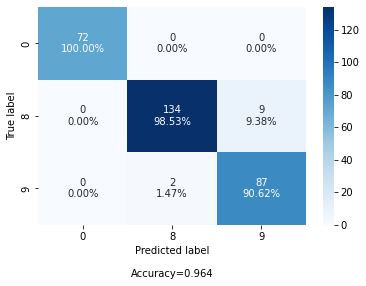

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=labelnames)